In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import random

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
   442368/170498071 ━━━━━━━━━━━━━━━━━━━━ 3:10:32 67us/step

PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\namya\\.keras\\datasets\\cifar-10-batches-py-target_archive'

In [ ]:
# Normalize the images to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # CIFAR-10 images are 32x32 with 3 channels (RGB)
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer=SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.2719 - loss: 2.0086 - val_accuracy: 0.3092 - val_loss: 1.9079
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.3832 - loss: 1.7382 - val_accuracy: 0.3935 - val_loss: 1.6978
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4149 - loss: 1.6395 - val_accuracy: 0.4198 - val_loss: 1.6572
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.4306 - loss: 1.5924 - val_accuracy: 0.4453 - val_loss: 1.5673
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.4540 - loss: 1.5477 - val_accuracy: 0.4301 - val_loss: 1.6091
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.4606 - loss: 1.5114 - val_accuracy: 0.4192 - val_loss: 1.6732
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4774 - loss: 1.4756 - val_accuracy: 0.4496 - val_loss: 1.5405
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4884 - loss: 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5167 - loss: 1.3957
Test Loss: 1.4053822755813599
Test Accuracy: 0.5060999989509583


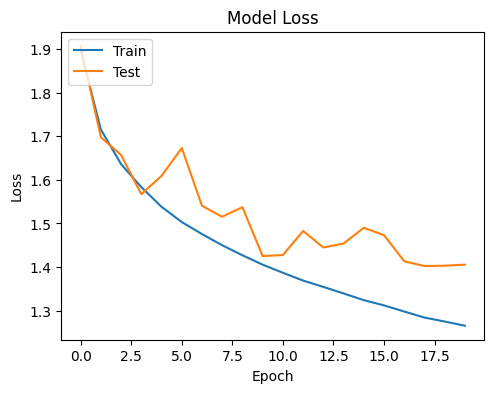

In [ ]:
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


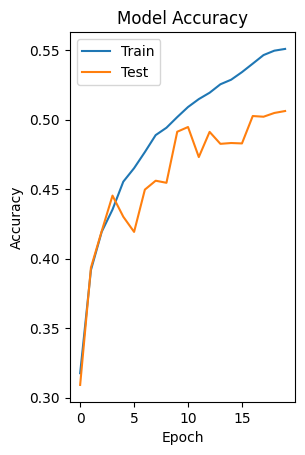

In [ ]:
# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

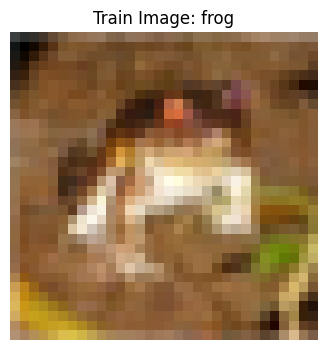

In [ ]:
# Plot one training image
plt.figure(figsize=(4, 4))
plt.imshow(x_train[0])
plt.title(f'Train Image: {class_names[np.argmax(y_train[0])]}')
plt.axis('off')
plt.show()


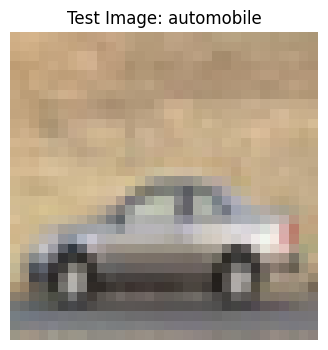

In [ ]:
# Plot one testing image
n = random.randint(0, len(x_test) - 1)
plt.figure(figsize=(4, 4))
plt.imshow(x_test[n])
plt.title(f'Test Image: {class_names[np.argmax(y_test[n])]}')
plt.axis('off')
plt.show()

In [3]:
plt.matshow(x_test[7])
y_pred=model.predict(x_test)
print("This Picture is of: ", np.argmax(y_pred[7]))

NameError: name 'x_test' is not defined